In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [4]:
dataframe= pd.read_csv(r"C:\Users\lenovo\Downloads\fraudTest.csv")

In [5]:
dataframe.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
def segment_by_amount (row):
    if row['amt']>50:
        return 'High Value'
    elif row['amt']>50:
        return 'Medium Value'
    else:
        return 'Low Value'
    
dataframe['AmountSegment']= dataframe.apply(segment_by_amount, axis=1)

print(dataframe.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      long city_pop  \
0   Elliott      M            351 Darlene Green  ...  -80.9355   333497   
1  Williams      F             3638 Marsh Union  ... -110.4360

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18500\1008491592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AmountSegment', data=dataframe,palette='viridis')


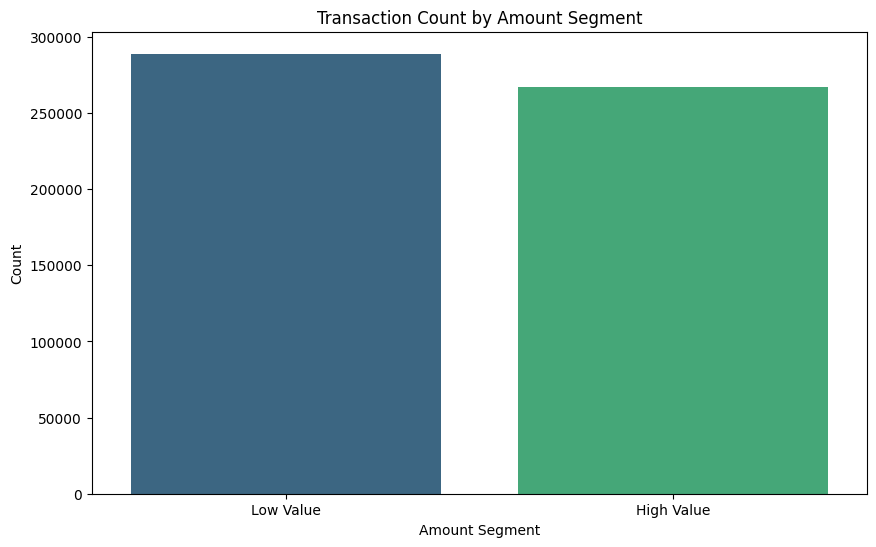

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='AmountSegment', data=dataframe,palette='viridis')
plt.title('Transaction Count by Amount Segment')
plt.xlabel('Amount Segment')
plt.ylabel('Count')
plt.show()

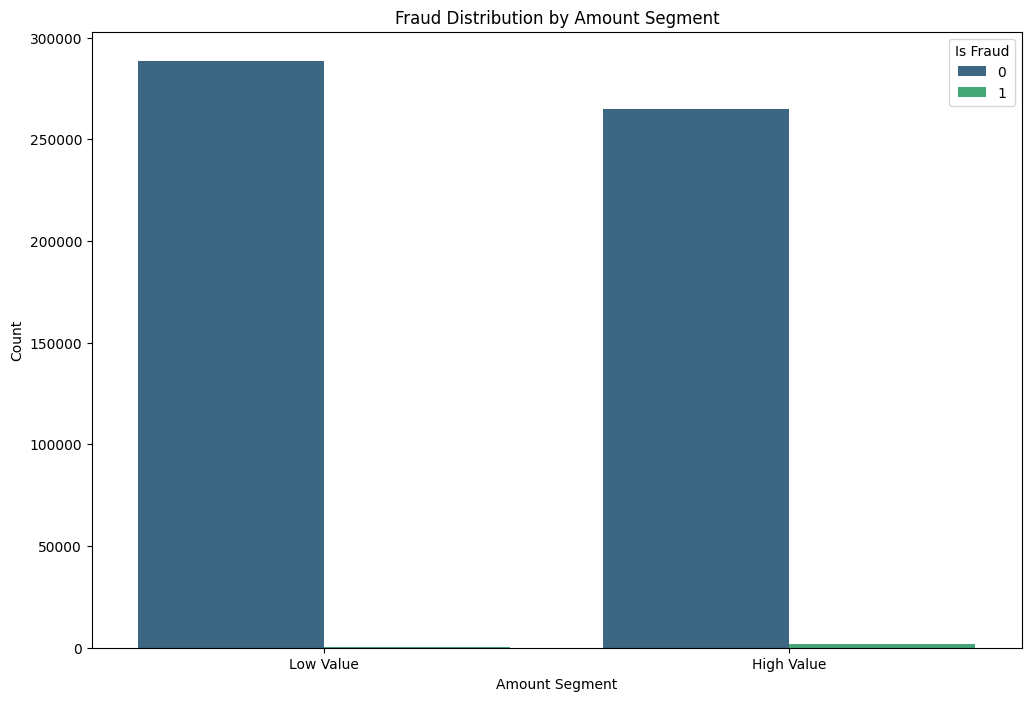

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x='AmountSegment',hue='is_fraud',data=dataframe,palette='viridis')
plt.title('Fraud Distribution by Amount Segment')
plt.xlabel('Amount Segment')
plt.ylabel('Count')
plt.legend(title='Is Fraud',loc= 'upper right')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18500\3881050372.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='category', data=dataframe, palette='viridis',order= dataframe['category'].value_counts().index)


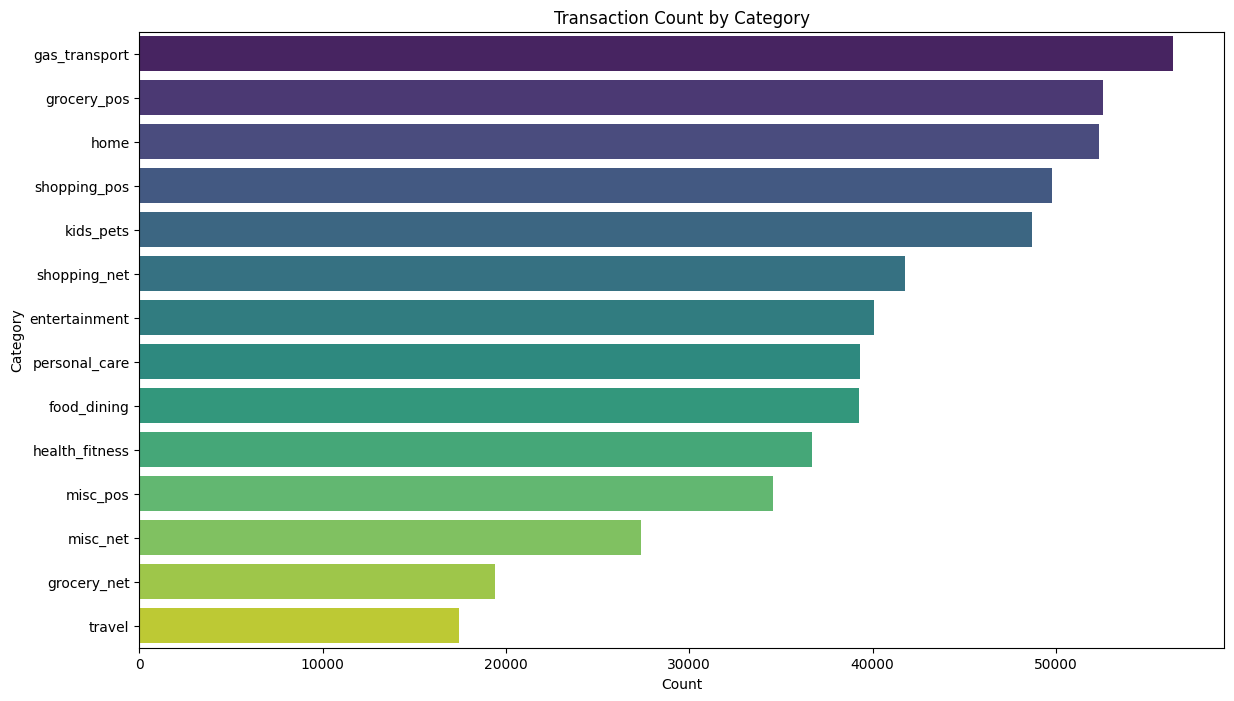

In [9]:
plt.figure(figsize=(14,8))
sns.countplot(y='category', data=dataframe, palette='viridis',order= dataframe['category'].value_counts().index)
plt.title('Transaction Count by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

In [10]:
dataframe=pd.read_csv(r"C:\Users\lenovo\Downloads\fraudTest.csv")
dataframe= dataframe.head(2000)

print(dataframe.head())
print(dataframe.info())
print(dataframe.describe())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

In [11]:
for column in dataframe.columns:
    if dataframe[column].dtype in ['int64', 'float64']:
        dataframe[column].fillna(dataframe[column].mean(),inplace=True)
    else:
        dataframe[column].fillna(dataframe[column].mode()[0],inplace=True)
        

C:\Users\lenovo\AppData\Local\Temp\ipykernel_18500\3962579159.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[column].fillna(dataframe[column].mean(),inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_18500\3962579159.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [12]:
label_encoders={}
for column in dataframe.select_dtypes(include=['object']).columns:
    le=LabelEncoder()
    dataframe[column] = le.fit_transform (dataframe[column])
    label_encoders[column]=le

In [13]:
dataframe= dataframe.drop(columns= ['Unnamed: 0','trans_date_trans_time','first','last','street','city','state','job','dob'])
X= dataframe.drop(columns=['is_fraud'])
Y= dataframe['is_fraud']

In [14]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

In [15]:
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [16]:
log_reg= LogisticRegression()
rf_clf= RandomForestClassifier()
gb_clf= GradientBoostingClassifier()


In [17]:
#Train models
log_reg.fit(X_train,Y_train)


LogisticRegression()

In [18]:
rf_clf.fit(X_train,Y_train)


RandomForestClassifier()

In [19]:

gb_clf.fit(X_train,Y_train)

GradientBoostingClassifier()

In [20]:
#Evaluate models using cross validation
models= [log_reg,rf_clf,gb_clf]
model_names=['LogisticRegression','Random Forest','Gradient Booster']

for model, name in zip(models, model_names):
    scores= cross_val_score(model,X_train,Y_train,cv=5, scoring='roc_auc')
    print(f"{name} ROC-AUC: {scores.mean():.2f}+- {scores.std():.2f}")


LogisticRegression ROC-AUC: 0.96+- 0.04
Random Forest ROC-AUC: 0.89+- 0.21
Gradient Booster ROC-AUC: 0.80+- 0.25


In [21]:
#Evaluate models on test set
def evaluate_model(model,X_test,Y_test):
    Y_pred= model.predict(X_test)
    Y_prob= model.predict_proba(X_test)[:,1]
    accuracy= accuracy_score(Y_test,Y_pred)
    precision= precision_score(Y_test, Y_pred)
    recall= recall_score(Y_test,Y_pred)
    f1=f1_score(Y_test, Y_pred)
    roc_auc= roc_auc_score(Y_test, Y_prob)
    return accuracy, precision,recall,f1,roc_auc


In [22]:
for model, name in zip (models, model_names):
    accuracy, precision, recall, f1, roc_auc= evaluate_model(model,X_test,Y_test)
    print(f"{name}- Accuracy:{accuracy:2f}, Precision:{precision:.2f},Recall:{recall:.2f},F1-Score{f1:.2f},ROC-AUC{roc_auc:.2f}")

LogisticRegression- Accuracy:0.995000, Precision:0.00,Recall:0.00,F1-Score0.00,ROC-AUC0.99
Random Forest- Accuracy:0.997500, Precision:1.00,Recall:0.50,F1-Score0.67,ROC-AUC1.00
Gradient Booster- Accuracy:0.997500, Precision:1.00,Recall:0.50,F1-Score0.67,ROC-AUC0.50


c:\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
from sklearn.model_selection import GridSearchCV
param_grid_rf={
    'n_estimators':[100,200],
    'max_depth': [10,20,None],
    'min_samples_split':[2,5,10]
}
grid_rf=GridSearchCV(rf_clf,param_grid_rf,cv=5,scoring='roc_auc')
grid_rf.fit(X_train,Y_train)
print(f"Best parameters for Random Forest: {grid_rf.best_params_}")

param_grid_gb={
    'n_estimators': [100,200],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1,0.2]
}
grid_gb= GridSearchCV(gb_clf, param_grid_gb, cv=5, scoring='roc_auc')
grid_gb.fit(X_train, Y_train)
print(f"Best Parameters for Gradient Boosting: {grid_gb.best_params_}")


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [24]:
best_rf= grid_rf.best_estimator_
best_gb= grid_gb.best_estimator_

for model, name in zip ([log_reg, best_rf,best_gb], ['Logistic Regression', ' Tuned Random Forest','Tuned Gradient Boosting']):
    accuracy,precision,recall,f1,roc_auc= evaluate_model(model, X_test, Y_test)
    print(f"{name}- Accuracy: {accuracy:.2f}, Precision:{precision:.2f}, Recall:{recall:.2f}, F1-Score:{f1:.2f},ROC-AUC:{roc_auc:.2f}")

Logistic Regression- Accuracy: 0.99, Precision:0.00, Recall:0.00, F1-Score:0.00,ROC-AUC:0.99
 Tuned Random Forest- Accuracy: 1.00, Precision:1.00, Recall:0.50, F1-Score:0.67,ROC-AUC:1.00
Tuned Gradient Boosting- Accuracy: 1.00, Precision:1.00, Recall:0.50, F1-Score:0.67,ROC-AUC:0.50


c:\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


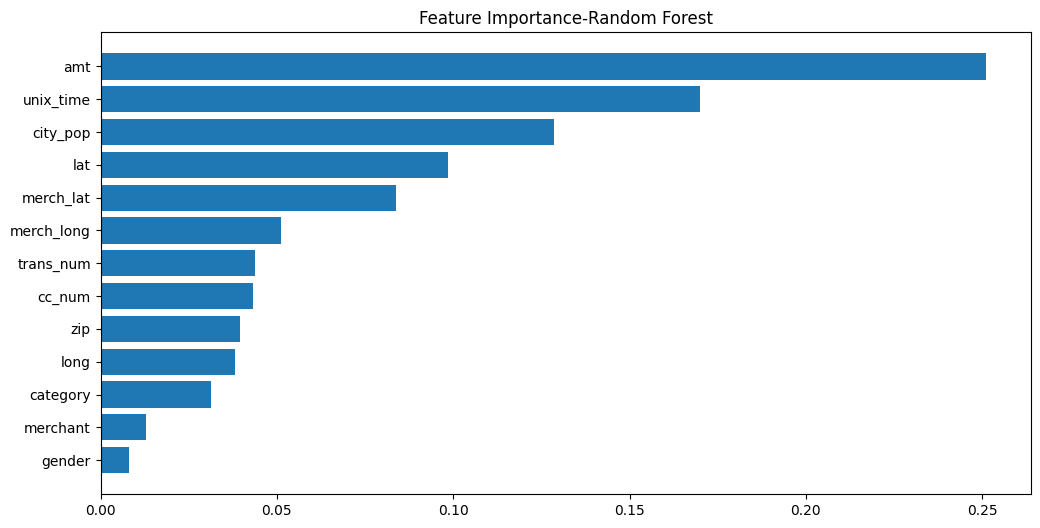

In [25]:
feature_importance_rf= best_rf.feature_importances_
sorted_idx_rf=np.argsort(feature_importance_rf)
plt.figure(figsize=(12,6))
plt.barh(range(len(sorted_idx_rf)),feature_importance_rf[sorted_idx_rf],align='center')
plt.yticks(range(len(sorted_idx_rf)), X.columns[sorted_idx_rf])
plt.title('Feature Importance-Random Forest')
plt.show()

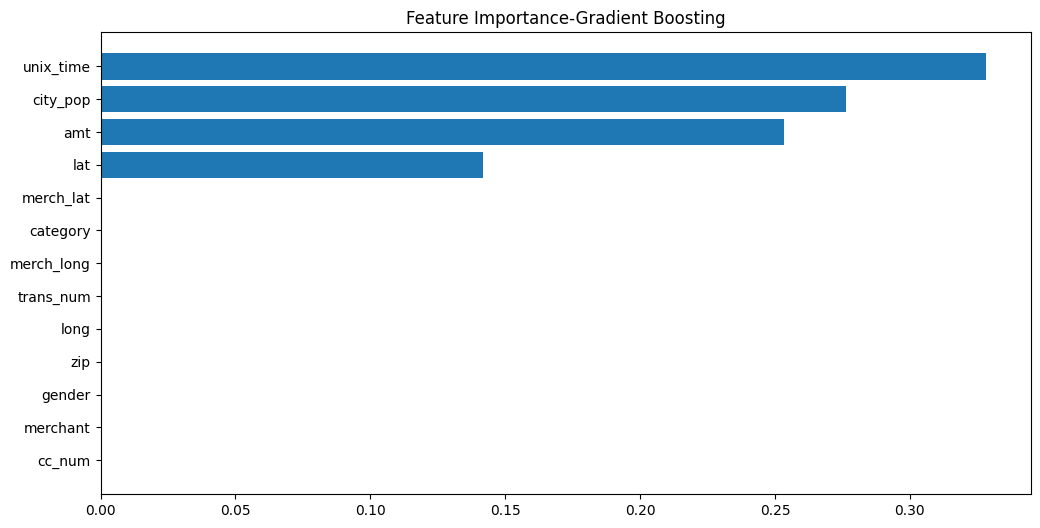

In [26]:
feature_importance_gb= best_gb.feature_importances_
sorted_idx_gb=np.argsort(feature_importance_gb)
plt.figure(figsize=(12,6))
plt.barh(range(len(sorted_idx_gb)),feature_importance_gb[sorted_idx_gb],align='center')
plt.yticks(range(len(sorted_idx_gb)), X.columns[sorted_idx_gb])
plt.title('Feature Importance-Gradient Boosting')
plt.show()

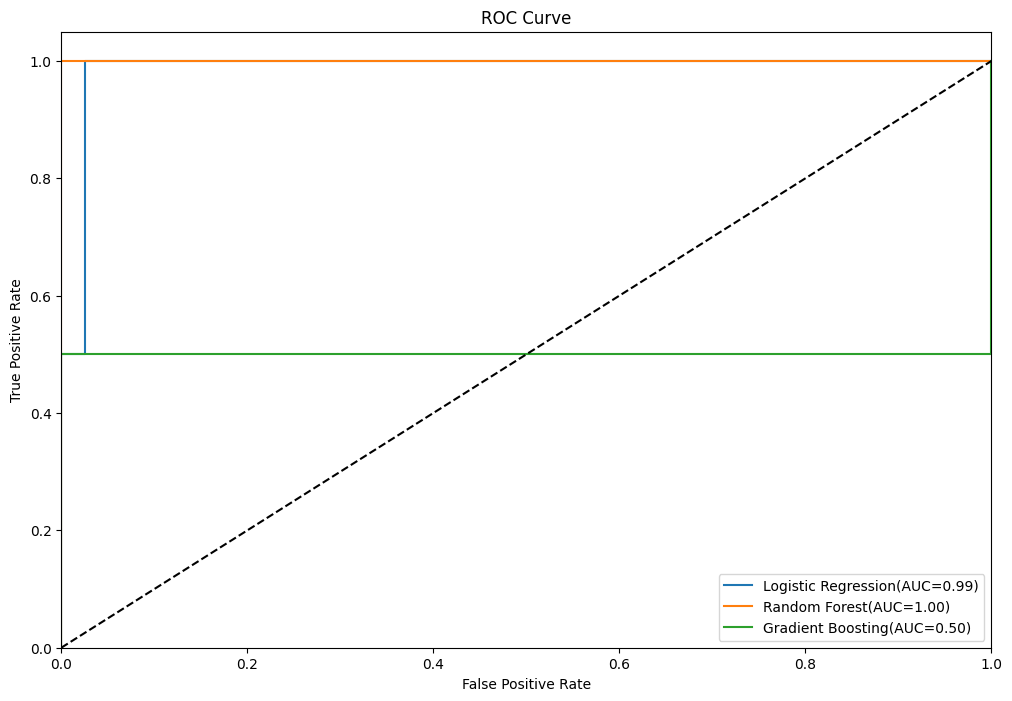

In [29]:
plt.figure(figsize=(12,8))
for model, name in zip ([log_reg, best_rf,best_gb],['Logistic Regression','Random Forest','Gradient Boosting']):
    Y_prob= model.predict_proba(X_test)[:,1]
    fpr,tpr,_=roc_curve(Y_test,Y_prob)
    plt.plot(fpr,tpr, label=f"{name}(AUC={roc_auc_score(Y_test,Y_prob):.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim ([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()